Pada tugas ini, dataset yang digunakan adalah data prediksi penyakit diabetes berdasarkan gender, age, hypertension, heart disease, smoking_history, dan beberapa fitur lainnya.  

Dataset ini dapat didownload pada : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


## Import Dataset

In [2]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
55041,Male,70.0,0.0,0.0,former,26.88,5.8,140.0,1.0
55042,Male,13.0,0.0,0.0,never,20.54,4.0,140.0,0.0
55043,Male,52.0,0.0,0.0,never,29.05,6.1,140.0,0.0
55044,Male,47.0,0.0,0.0,No Info,27.32,4.5,160.0,0.0


##Processing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55046 entries, 0 to 55045
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55046 non-null  object 
 1   age                  55046 non-null  float64
 2   hypertension         55045 non-null  float64
 3   heart_disease        55045 non-null  float64
 4   smoking_history      55045 non-null  object 
 5   bmi                  55045 non-null  float64
 6   HbA1c_level          55045 non-null  float64
 7   blood_glucose_level  55045 non-null  float64
 8   diabetes             55045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB


In [4]:
print(df.duplicated())
print(df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
55041    False
55042    False
55043    False
55044    False
55045    False
Length: 55046, dtype: bool
1251


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

In [8]:
df.describe(include='object')

,gender,smoking_history
count,53795,53794
unique,3,6
top,Female,never
freq,31506,19135


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,53795.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,41.801178,0.076477,0.039744,27.332421,5.531364,138.061661,0.088411
std,22.451506,0.265762,0.195359,6.725524,1.073315,41.105442,0.283895
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.490000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.750000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [10]:
numeric_col=[]
non_numeric_col=[]
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        if(df[column].nunique()<5):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [11]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


In [12]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(12,10))
    sns.histplot(x=df[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col}.')

    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}     ')

Melihat distribusi dari fitur-fitur

 Univariate analysis for age column:
 Univariate analysis for bmi column:
 Univariate analysis for HbA1c_level column:
 Univariate analysis for blood_glucose_level column:


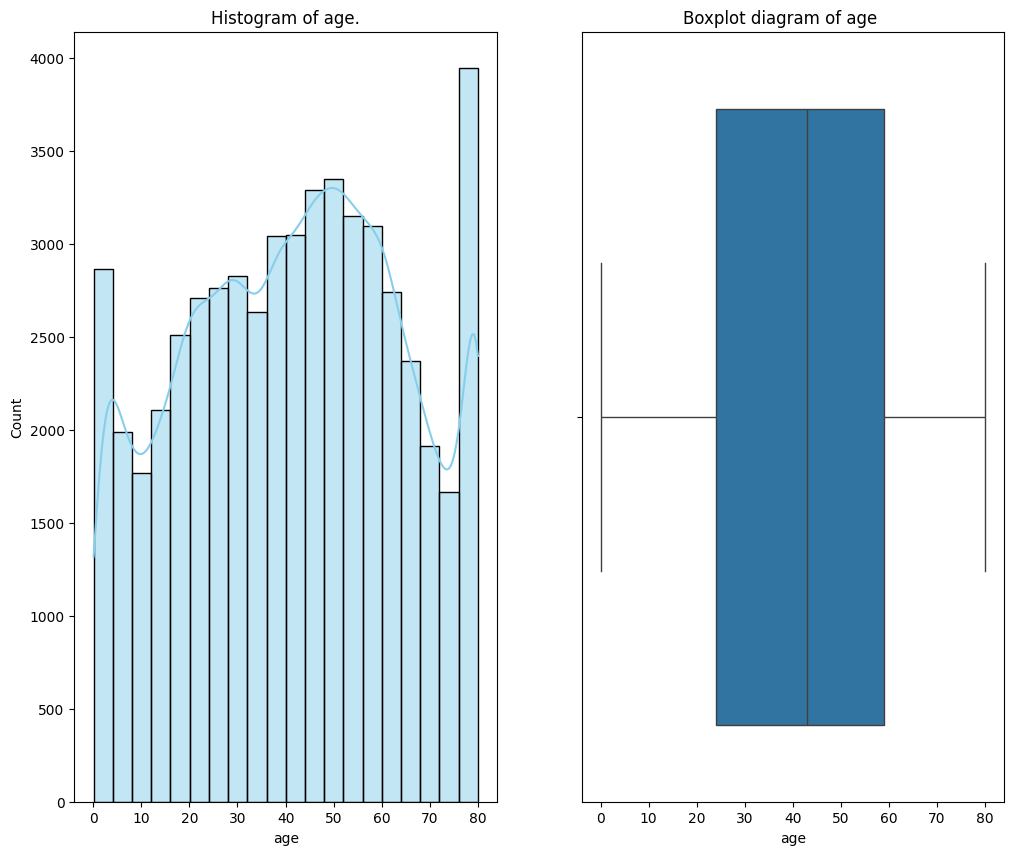

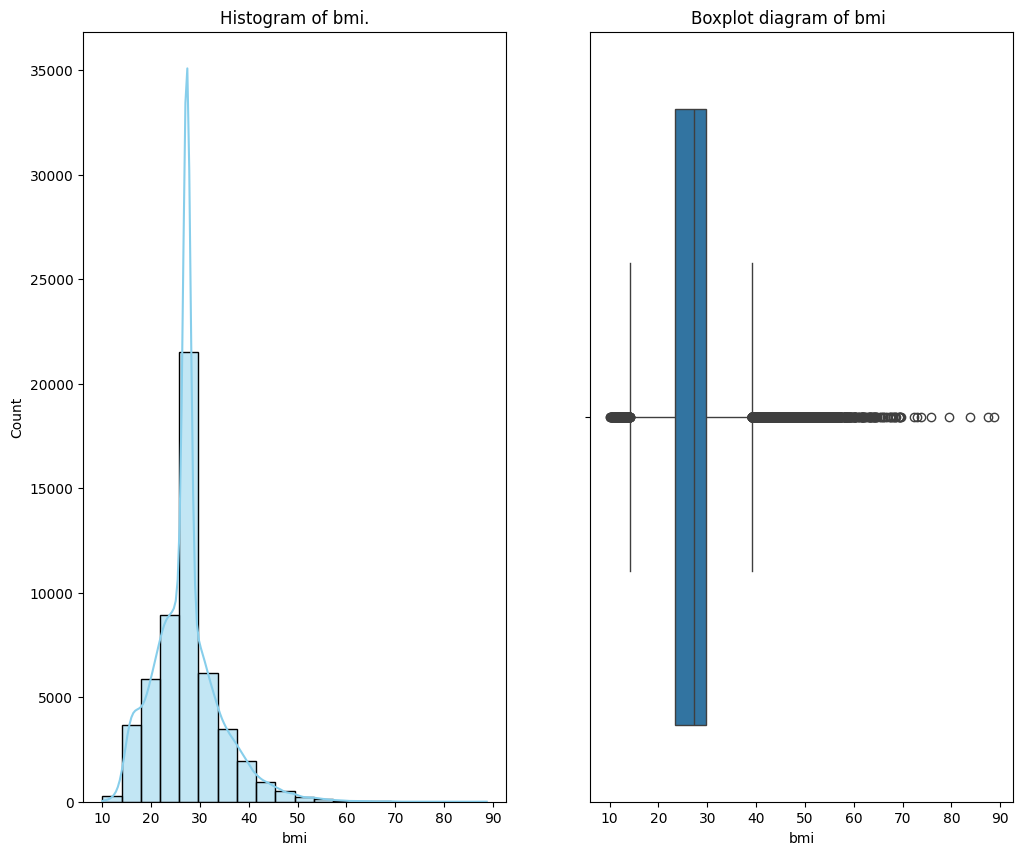

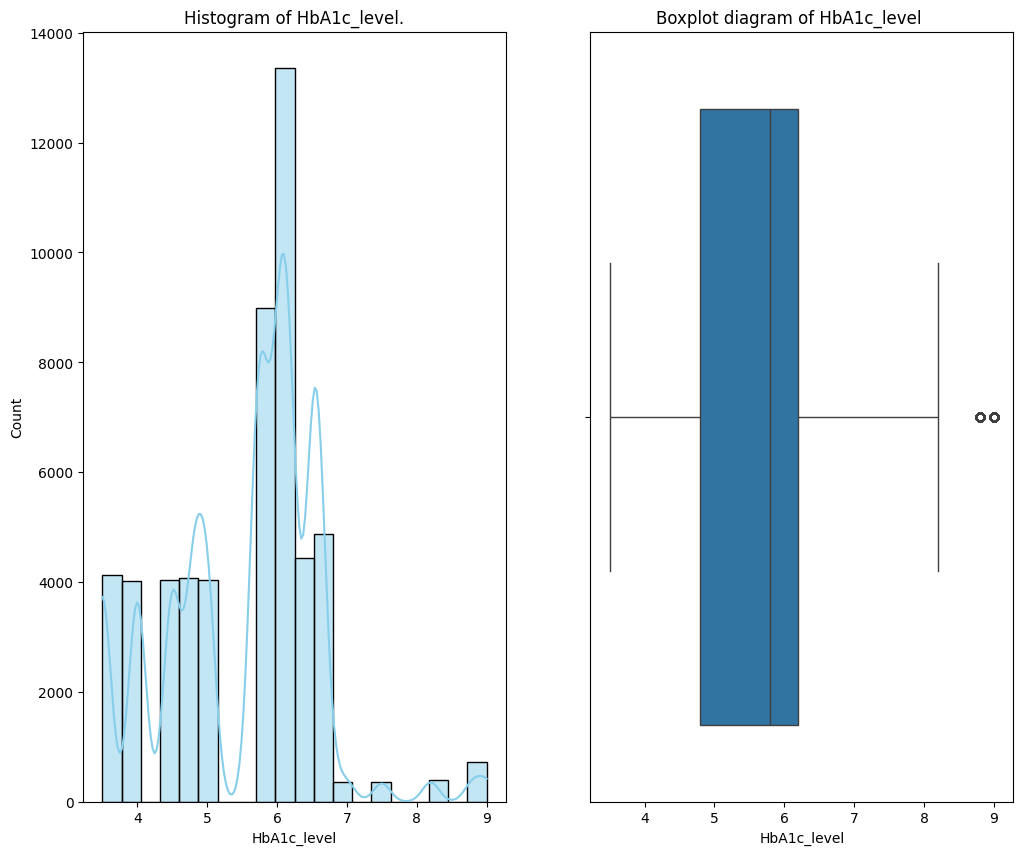

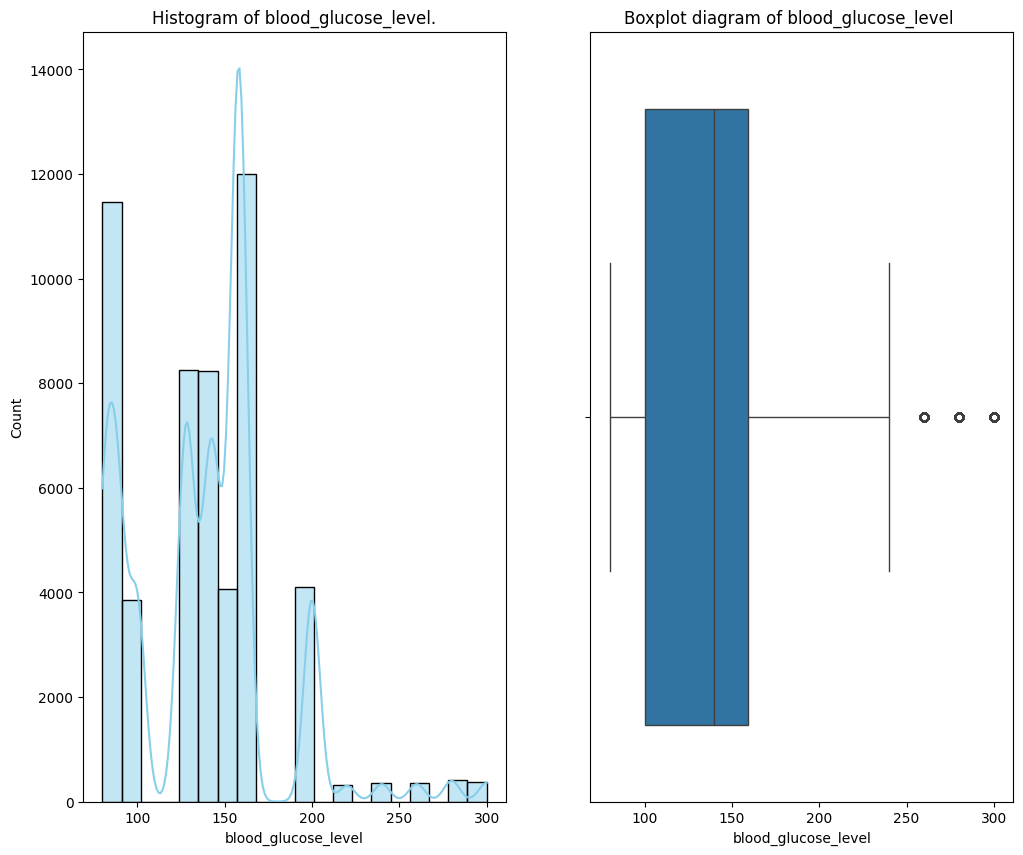

In [13]:
for col in numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

In [14]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')

    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')

    plt.show()

 Univariate analysis for gender column:


<ipython-input-14-09c3a4fe253e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


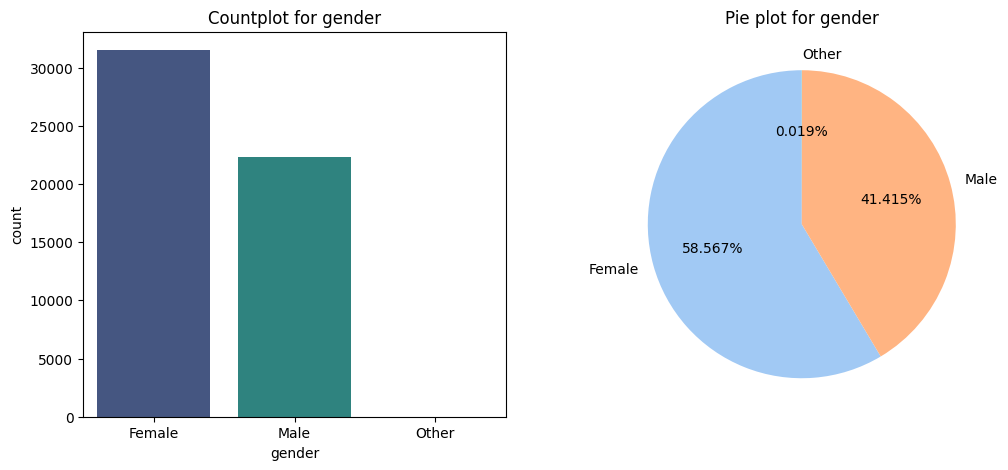

 Univariate analysis for hypertension column:


<ipython-input-14-09c3a4fe253e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


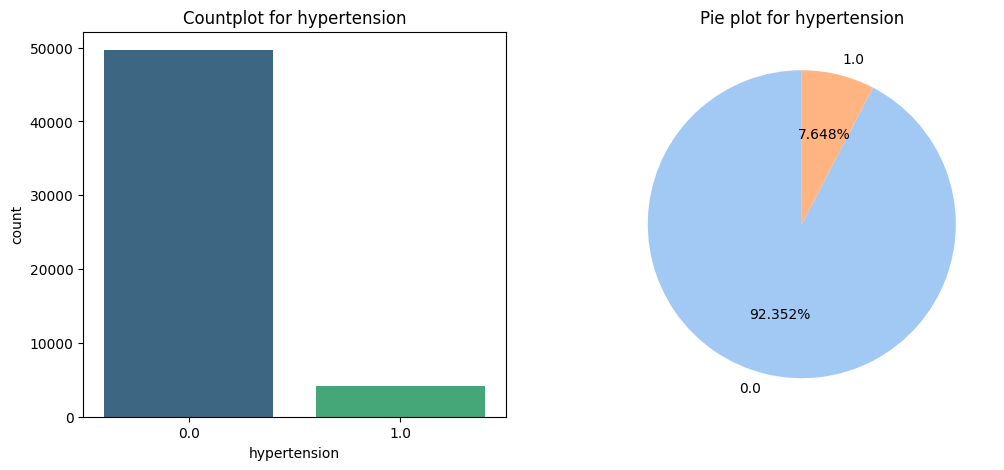

 Univariate analysis for heart_disease column:


<ipython-input-14-09c3a4fe253e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


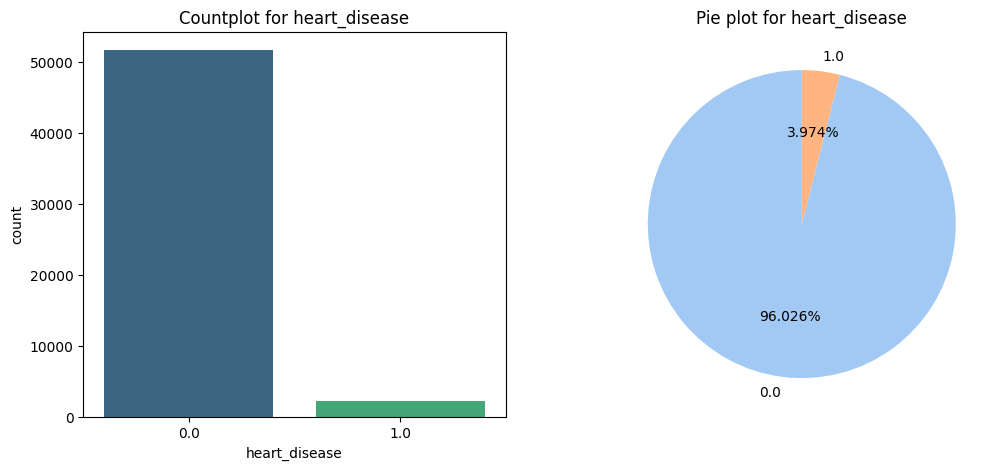

 Univariate analysis for smoking_history column:


<ipython-input-14-09c3a4fe253e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


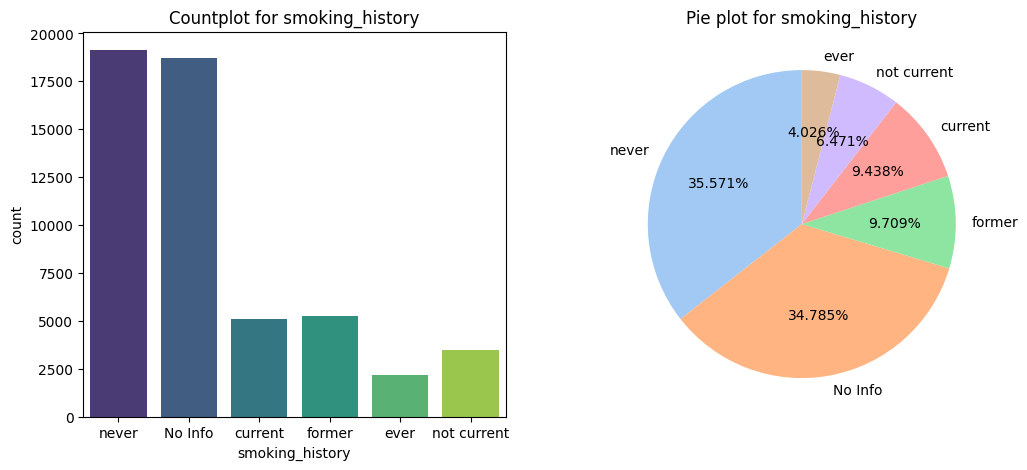

 Univariate analysis for diabetes column:


<ipython-input-14-09c3a4fe253e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])


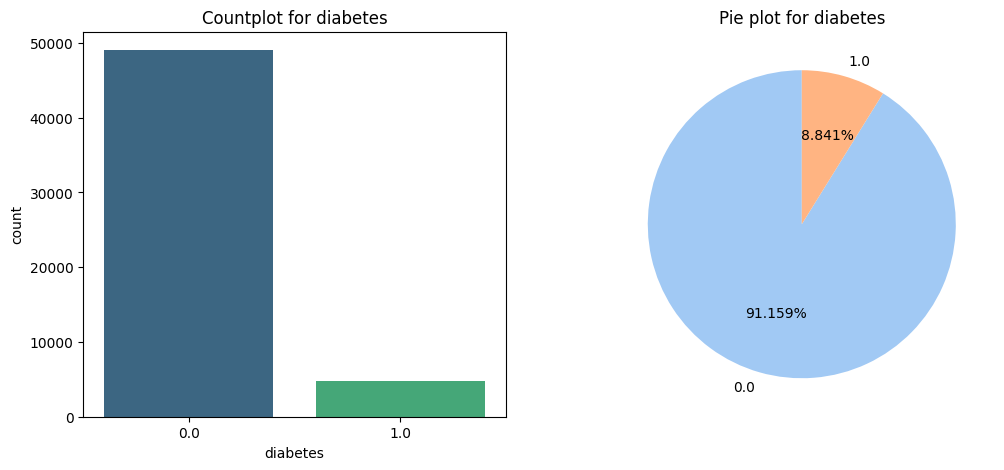

In [15]:
for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

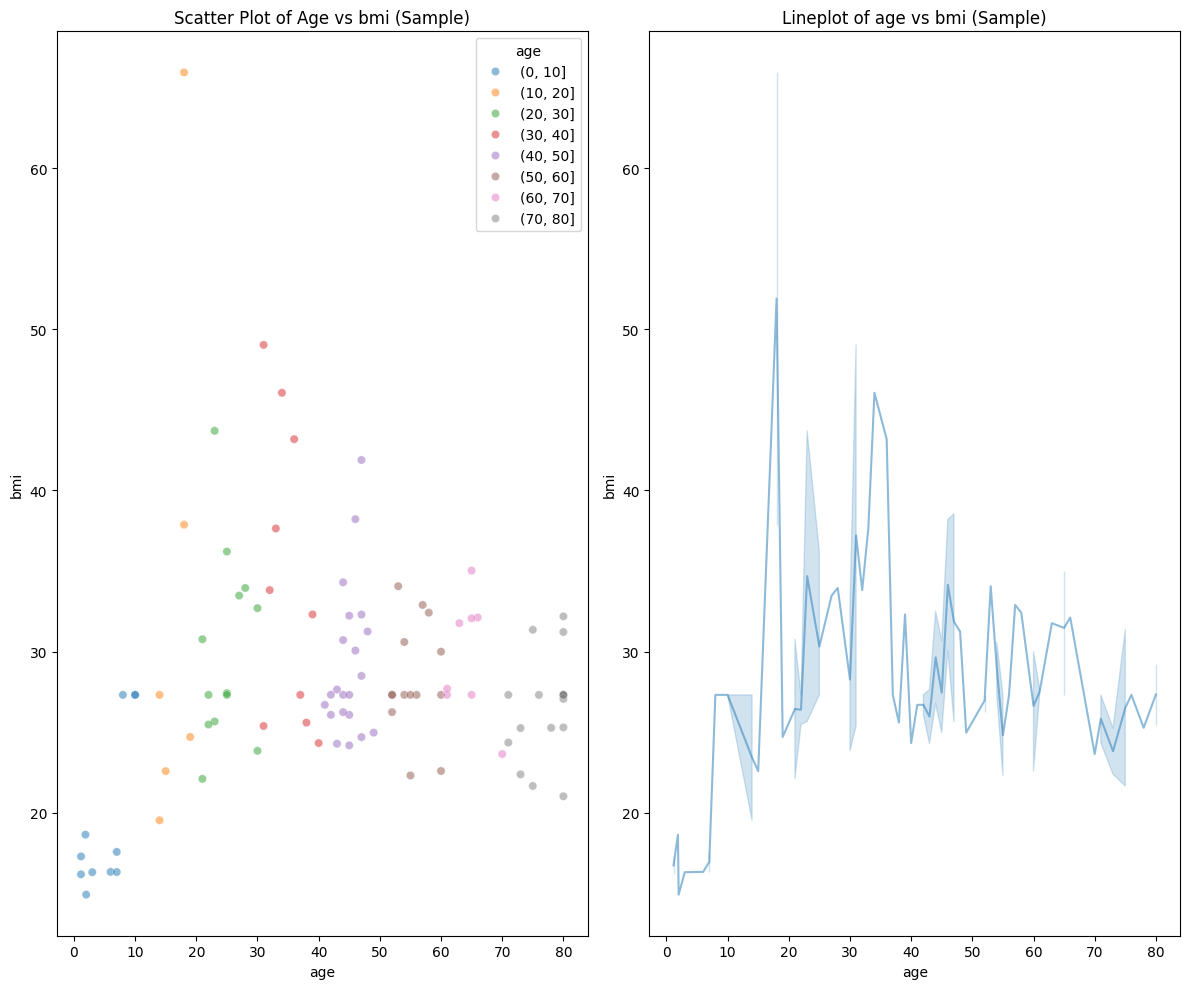

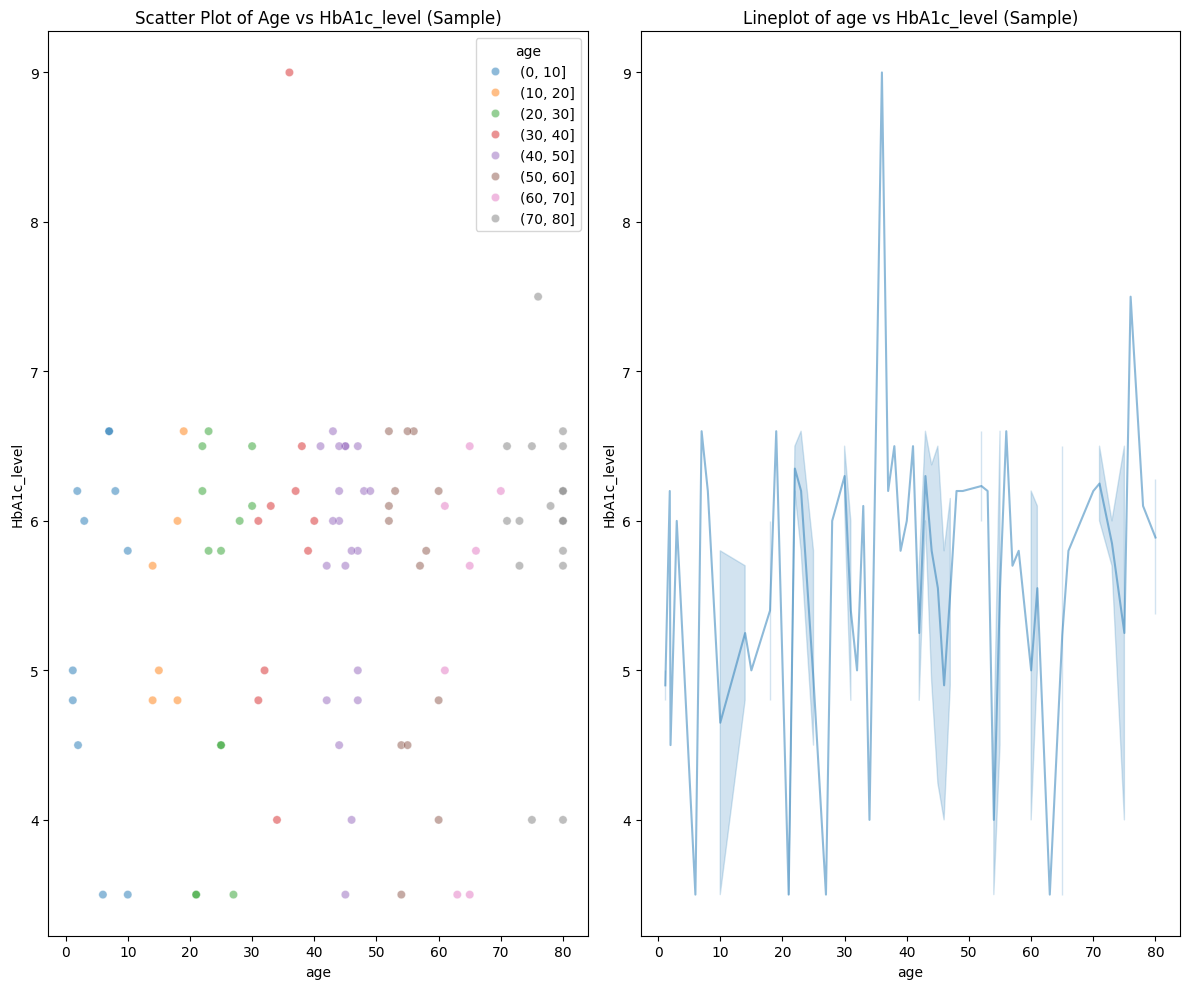

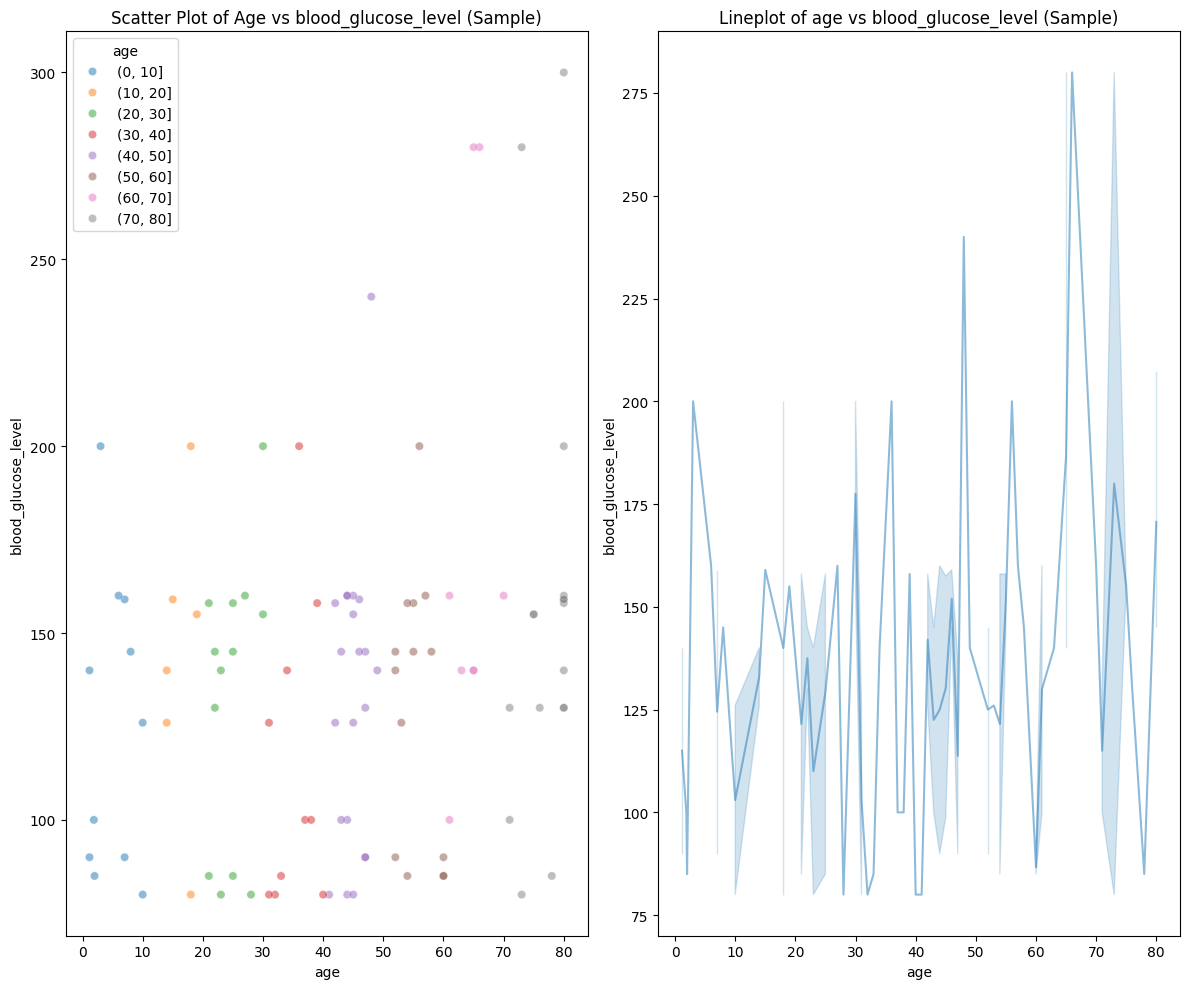

In [16]:
sample_size = 100
sample_df = df.sample(n=sample_size, random_state=42)
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

for col in numeric_col[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    sns.scatterplot(x='age', y=df[col], data=sample_df,hue=age_group, alpha=0.5,ax=ax[0])
    ax[0].set_title(f'Scatter Plot of Age vs {col} (Sample)')

    sns.lineplot(x='age',y=df[col],data=sample_df,alpha=0.5,ax=ax[1])
    ax[1].set_title(f'Lineplot of age vs {col} (Sample)')
    plt.tight_layout()
    plt.show()

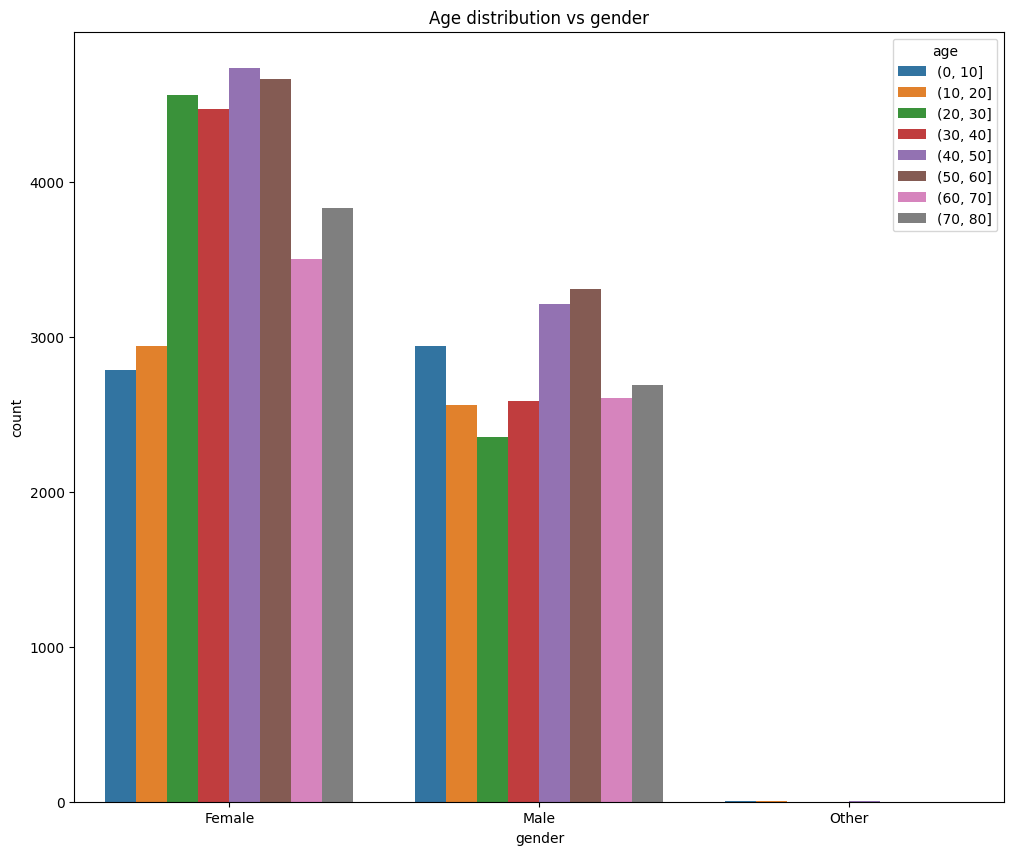

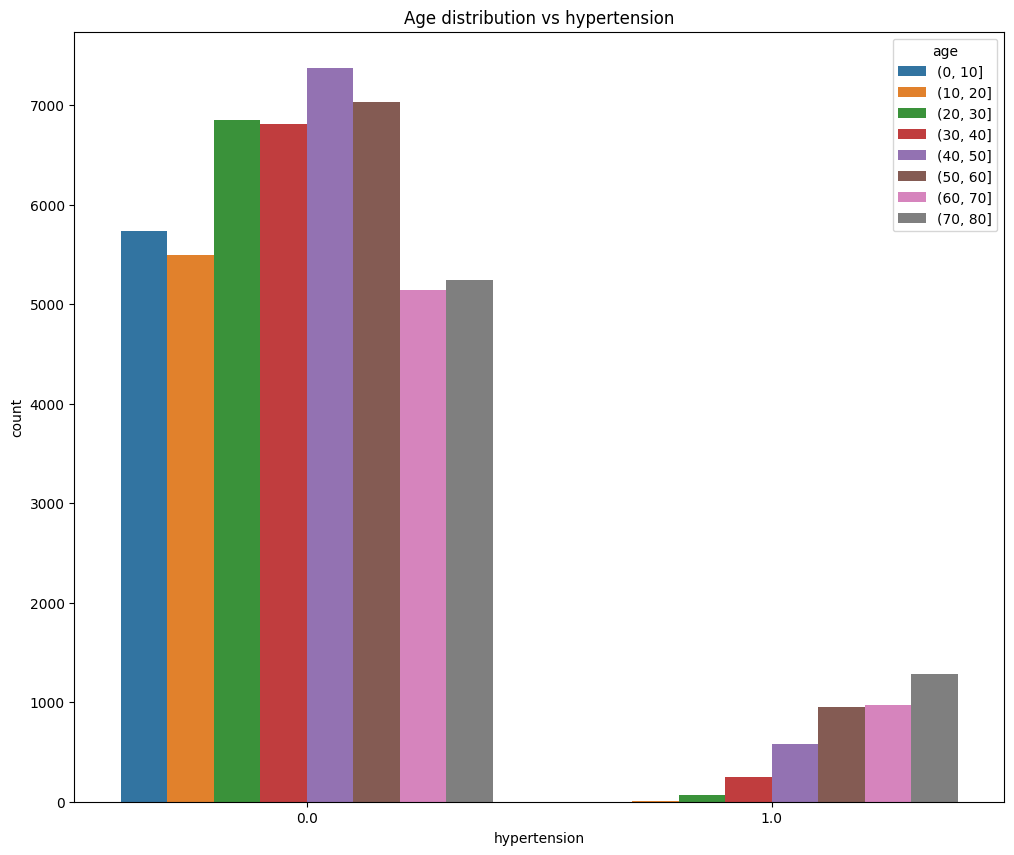

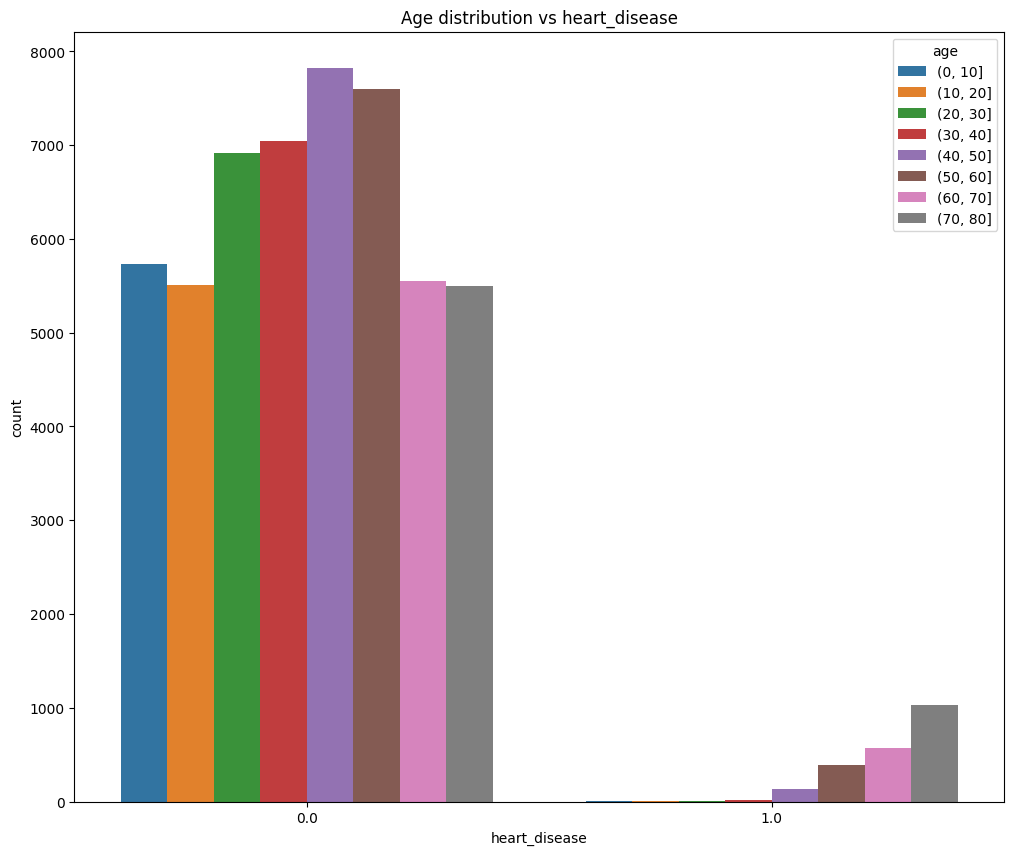

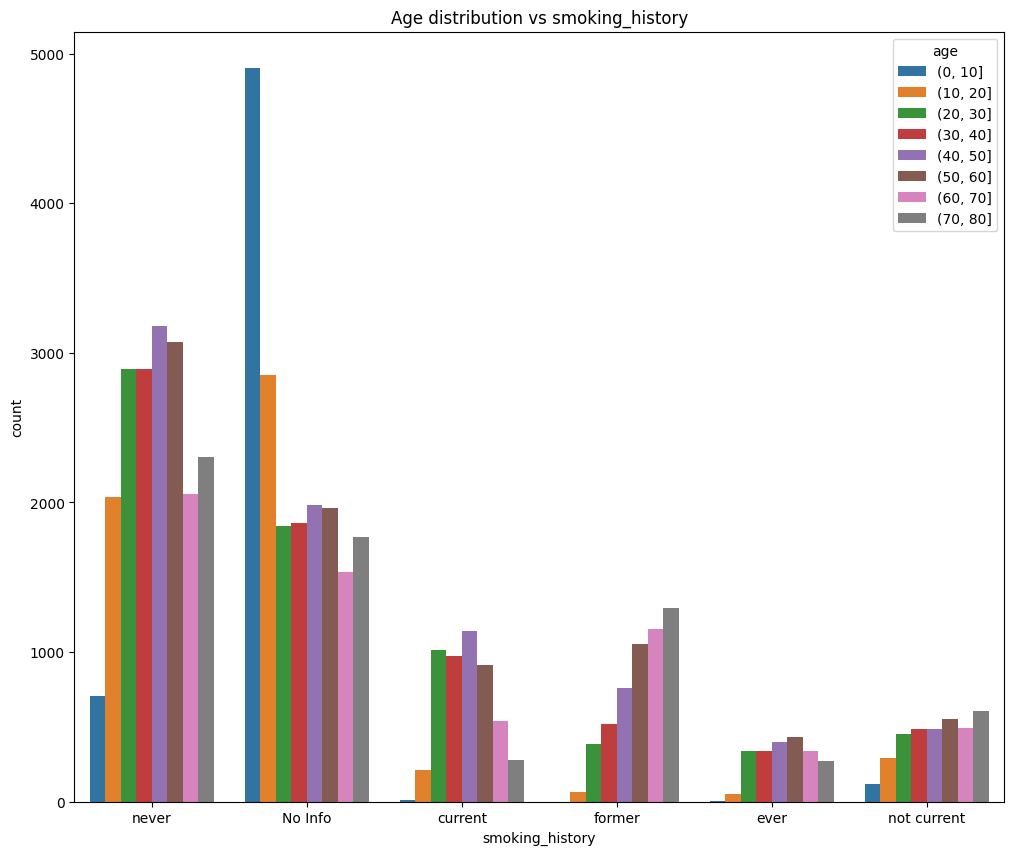

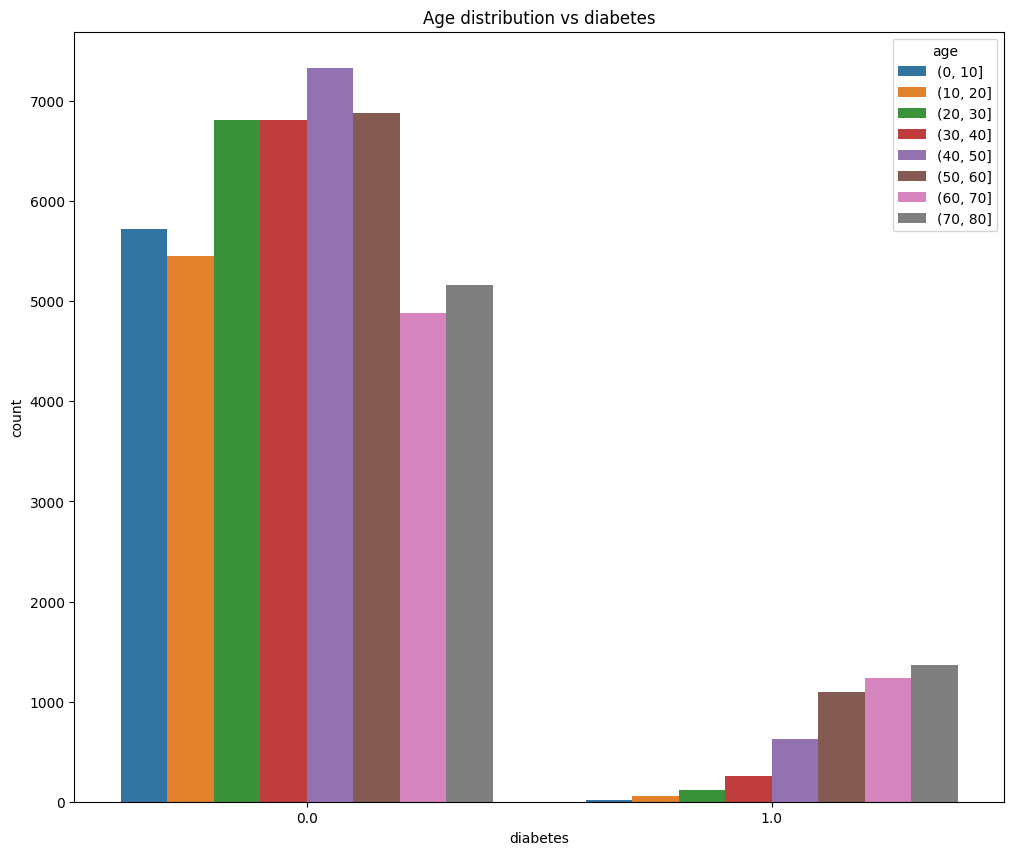

In [17]:
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
for i in non_numeric_col:
    plt.figure(figsize=(12,10))
    sns.countplot(x=df[i],data=df,hue=age_group)
    plt.title(f'Age distribution vs {i}')
    plt.show()

Transformasi data pada fitur yang tipe datanya object menggunakan Label Encoder

In [18]:
le=LabelEncoder()
for col in non_numeric_col:
    sample_df[col]=le.fit_transform(sample_df[col])
sample_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
44347,0,65.00,1,0,1,32.07,6.5,140.0,0
4273,1,44.00,0,0,0,27.32,4.5,160.0,0
48242,0,78.00,0,0,4,25.28,6.1,85.0,0
48682,0,40.00,0,0,4,24.33,6.0,80.0,0
14040,0,44.00,1,0,1,30.72,6.5,80.0,0
...,...,...,...,...,...,...,...,...,...
34369,1,1.88,0,0,4,18.65,6.2,100.0,0
42927,1,54.00,0,0,4,30.60,3.5,85.0,0
11821,0,30.00,0,0,4,32.70,6.5,200.0,0
23429,0,42.00,0,0,4,26.08,5.7,158.0,0


Melihat korelasi antar fitur

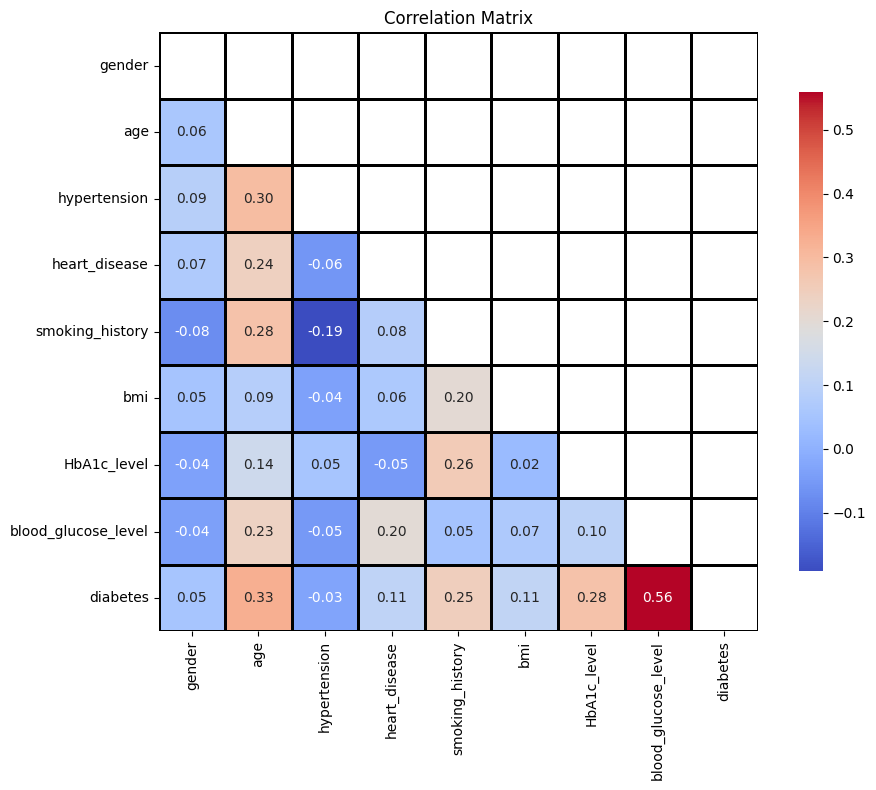

In [19]:
correlation_matrix = sample_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))  # Ubah ukuran figur sesuai kebutuhan Anda
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=1,
            linecolor='black', square=True, fmt=".2f", cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Dari heatmap diatas, fitur age dan blood_glucose_level adalah 2 fitur yang memiliki korelasi paling tinggi pada prediksi penyakit diabetes.

In [20]:
sample_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
44347,0,65.0,1,0,1,32.07,6.5,140.0,0
4273,1,44.0,0,0,0,27.32,4.5,160.0,0
48242,0,78.0,0,0,4,25.28,6.1,85.0,0
48682,0,40.0,0,0,4,24.33,6.0,80.0,0
14040,0,44.0,1,0,1,30.72,6.5,80.0,0


Membagi fitur sebagai x dan y sebagai label

In [34]:
x = sample_df.iloc[:, [1, 7]].values
y = sample_df.iloc[:, 8].values

## Build Model SVM LINEAR

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [36]:
y_pred = model_svm.predict(X_test)

In [37]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.9333333333333333


In [38]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.50      0.67         4

    accuracy                           0.93        30
   macro avg       0.96      0.75      0.81        30
weighted avg       0.94      0.93      0.92        30



<ipython-input-49-0979a3283149>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


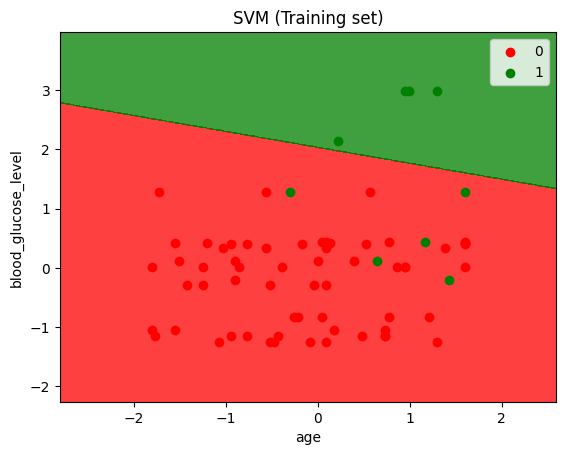

In [49]:
def plot_decision_boundary(X, y, model):
    # Mengambil indeks fitur 'age' dan 'blood_glucose_level' dari DataFrame
    age_index = 0  # Indeks kolom untuk 'age'
    blood_glucose_index = 1  # Indeks kolom untuk 'blood_glucose_level'

    X_2d = X

    scaler = StandardScaler()
    X_2d_scaled = scaler.fit_transform(X_2d)

    model.fit(X_2d_scaled, y)

    X1, X2 = np.meshgrid(np.arange(start = X_2d_scaled[:, 0].min() - 1, stop = X_2d_scaled[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_2d_scaled[:, 1].min() - 1, stop = X_2d_scaled[:, 1].max() + 1, step = 0.01))

    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('SVM (Training set)')
    plt.xlabel('age')
    plt.ylabel('blood_glucose_level')

    plt.legend()

    plt.show()

# Memanggil fungsi plot_decision_boundary dengan data dan model SVM yang telah dibuat
plot_decision_boundary(X_train, y_train, model_svm)


<ipython-input-50-698ce7753778>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


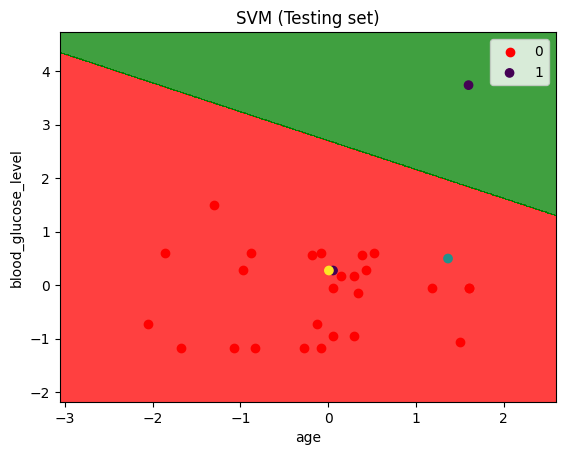

In [50]:
def plot_decision_boundary(X, y, model):
    age_index = 0  # Indeks kolom untuk 'age'
    blood_glucose_index = 1  # Indeks kolom untuk 'blood_glucose_level'

    X_2d = X

    # Normalisasi data
    scaler = StandardScaler()
    X_2d_scaled = scaler.fit_transform(X_2d)

    # Melatih model SVM dengan dua fitur
    model.fit(X_2d_scaled, y)

    X1, X2 = np.meshgrid(np.arange(start = X_2d_scaled[:, 0].min() - 1, stop = X_2d_scaled[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_2d_scaled[:, 1].min() - 1, stop = X_2d_scaled[:, 1].max() + 1, step = 0.01))

    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('SVM (Testing set)')
    plt.xlabel('age')
    plt.ylabel('blood_glucose_level')

    plt.legend()

    plt.show()

# Memanggil fungsi plot_decision_boundary dengan data dan model SVM yang telah dibuat
plot_decision_boundary(X_test, y_test, model_svm)


## Build Model NON-LINEAR using RBF

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model_svm_rbf = SVC(kernel = 'rbf', random_state = 0)
model_svm_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [42]:
y_pred = model_svm_rbf.predict(X_test)

In [43]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.9


In [44]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.25      0.40         4

    accuracy                           0.90        30
   macro avg       0.95      0.62      0.67        30
weighted avg       0.91      0.90      0.87        30



<ipython-input-51-a45134e220f8>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


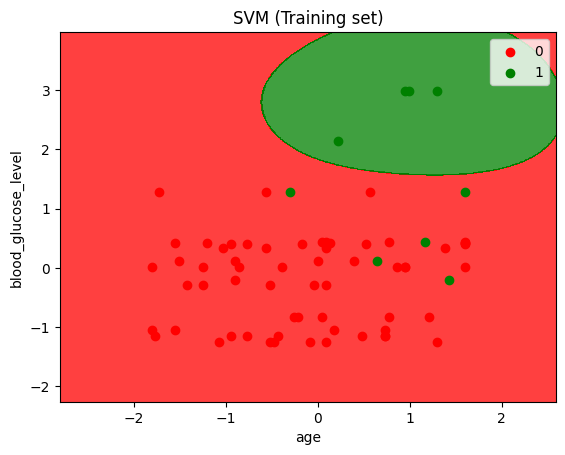

In [51]:
def plot_decision_boundary(X, y, model):
    age_index = 0  # Indeks kolom untuk 'age'
    blood_glucose_index = 1  # Indeks kolom untuk 'blood_glucose_level'

    X_2d = X

    # Normalisasi data
    scaler = StandardScaler()
    X_2d_scaled = scaler.fit_transform(X_2d)

    # Melatih model SVM dengan dua fitur
    model.fit(X_2d_scaled, y)

    X1, X2 = np.meshgrid(np.arange(start = X_2d_scaled[:, 0].min() - 1, stop = X_2d_scaled[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_2d_scaled[:, 1].min() - 1, stop = X_2d_scaled[:, 1].max() + 1, step = 0.01))

    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('SVM (Training set)')
    plt.xlabel('age')
    plt.ylabel('blood_glucose_level')

    plt.legend()

    plt.show()

# Memanggil fungsi plot_decision_boundary dengan data dan model SVM yang telah dibuat
plot_decision_boundary(X_train, y_train, model_svm_rbf)


<ipython-input-52-dec69fc65bd7>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


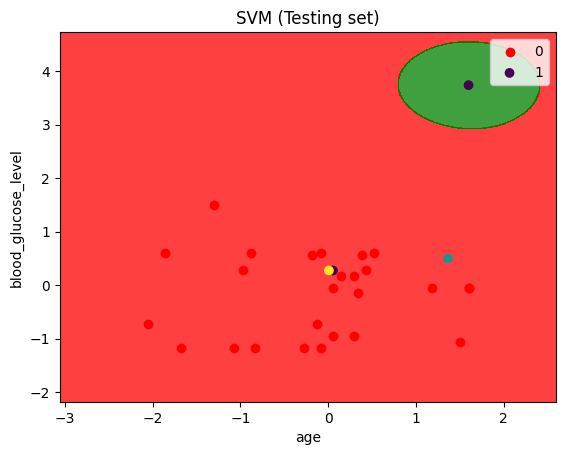

In [52]:
def plot_decision_boundary(X, y, model):
    age_index = 0  # Indeks kolom untuk 'age'
    blood_glucose_index = 1  # Indeks kolom untuk 'blood_glucose_level'

    X_2d = X

    # Normalisasi data
    scaler = StandardScaler()
    X_2d_scaled = scaler.fit_transform(X_2d)

    # Melatih model SVM dengan dua fitur
    model.fit(X_2d_scaled, y)

    X1, X2 = np.meshgrid(np.arange(start = X_2d_scaled[:, 0].min() - 1, stop = X_2d_scaled[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_2d_scaled[:, 1].min() - 1, stop = X_2d_scaled[:, 1].max() + 1, step = 0.01))

    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y)):
        plt.scatter(X_2d_scaled[y == j, 0], X_2d_scaled[y == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('SVM (Testing set)')
    plt.xlabel('age')
    plt.ylabel('blood_glucose_level')

    plt.legend()

    plt.show()

# Memanggil fungsi plot_decision_boundary dengan data dan model SVM yang telah dibuat
plot_decision_boundary(X_test, y_test, model_svm_rbf)


Visualisasi model linear dan non linear memberikan informasi bahwa model SVM dapat membangun hyperplane dengan baik antara 2 kelas diabetes.